# Data Perparation

In [ ]:
!wget "https://drive.google.com/u/0/uc?id=1rHb0FQ5z5ZpaY2HpyFGY6CeyDG0kTLoO&export=download" -O english_python_data.txt 
from google.colab import drive
drive.mount('/content/drive')
#/content/drive/MyDrive/FYP/Model/model.pt


--2022-05-12 15:14:59--  https://drive.google.com/u/0/uc?id=1rHb0FQ5z5ZpaY2HpyFGY6CeyDG0kTLoO&export=download
Resolving drive.google.com (drive.google.com)... 172.217.2.110, 2607:f8b0:4004:80a::200e
Connecting to drive.google.com (drive.google.com)|172.217.2.110|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1rHb0FQ5z5ZpaY2HpyFGY6CeyDG0kTLoO&export=download [following]
--2022-05-12 15:14:59--  https://drive.google.com/uc?id=1rHb0FQ5z5ZpaY2HpyFGY6CeyDG0kTLoO&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fjvi77vpnm7488cmbvk7nlhufra1avhs/1652368500000/02008525212197398114/*/1rHb0FQ5z5ZpaY2HpyFGY6CeyDG0kTLoO?e=download [following]
--2022-05-12 15:15:00--  https://doc-14-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fjvi77

In [ ]:
!pip install torchtext==0.11.0
import torch
import torch.nn as nn
import torch.optim as optim

import torchtext
from torchtext.legacy.data import Field, BucketIterator, Iterator
from torchtext.legacy import data

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import spacy
import numpy as np
import pandas as pd

import random
import math
import time

In [ ]:
torchtext.__version__

'0.11.0'

In [ ]:
%set_env CUDA_LAUNCH_BLOCKING = 1

env: CUDA_LAUNCH_BLOCKING=1


## Reading the text file

In [ ]:
f = open("english_python_data.txt", "r")
file_lines = f.readlines()

In [ ]:
file_lines[:20]

['# write a python program to add two numbers \n',
 'num1 = 1.5\n',
 'num2 = 6.3\n',
 'sum = num1 + num2\n',
 "print(f'Sum: {sum}')\n",
 '\n',
 '\n',
 '# write a python function to add two user provided numbers and return the sum\n',
 'def add_two_numbers(num1, num2):\n',
 '    sum = num1 + num2\n',
 '    return sum\n',
 '\n',
 '\n',
 '# write a program to find and print the largest among three numbers\n',
 '\n',
 'num1 = 10\n',
 'num2 = 12\n',
 'num3 = 14\n',
 'if (num1 >= num2) and (num1 >= num3):\n',
 '   largest = num1\n']

In [ ]:
dps = []
dp = None
for line in file_lines:
  if line[0] == "#":
    if dp:
      dp['solution'] = ''.join(dp['solution'])
      dps.append(dp)
    dp = {"question": None, "solution": []}
    dp['question'] = line[1:]
  else:
    dp["solution"].append(line)

In [ ]:
!pip install googletrans==3.1.0a0
import googletrans
from googletrans import Translator


In [ ]:
translator = Translator()

malay = []

for i, dp in enumerate(dps):
  text = str(dp['question'][1:])
  if text != '':
    result = translator.translate(text, src='en', dest='malay')
    malay.append(result.text)
  else:
    print("empty question at index", i)
    malay.append("")



empty question at index 866


In [ ]:
import csv

csv_file = []
f = [ "question", "snippet"]
for i, dp in enumerate(dps):
  text = {'question': dp['question'], 'snippet':dp['solution']}
  print(text)
  csv_file.append(text)

with open('/content/drive/MyDrive/FYP/Datasets/english_to_python.csv','w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames = f)
        writer.writeheader()
        
        writer.writerows(csv_file)

{'question': ' write a python program to add two numbers \n', 'snippet': "num1 = 1.5\nnum2 = 6.3\nsum = num1 + num2\nprint(f'Sum: {sum}')\n\n\n"}
{'question': ' write a python function to add two user provided numbers and return the sum\n', 'snippet': 'def add_two_numbers(num1, num2):\n    sum = num1 + num2\n    return sum\n\n\n'}
{'question': ' write a program to find and print the largest among three numbers\n', 'snippet': "\nnum1 = 10\nnum2 = 12\nnum3 = 14\nif (num1 >= num2) and (num1 >= num3):\n   largest = num1\nelif (num2 >= num1) and (num2 >= num3):\n   largest = num2\nelse:\n   largest = num3\nprint(f'largest:{largest}')\n\n\n"}
{'question': ' write a program to find and print the smallest among three numbers\n', 'snippet': "num1 = 10\nnum2 = 12\nnum3 = 14\nif (num1 <= num2) and (num1 <= num3):\n   smallest = num1\nelif (num2 <= num1) and (num2 <= num3):\n   smallest = num2\nelse:\n   smallest = num3\nprint(f'smallest:{smallest}')\n\n\n"}
{'question': ' Write a python function 

In [ ]:
i=0
for dp in dps:
  print("\n Question no: ", i+1)
  i+=1
  print(dp['question'][1:])
  print(dp['solution'])
  if i>10:
    break


 Question no:  1
write a python program to add two numbers 

num1 = 1.5
num2 = 6.3
sum = num1 + num2
print(f'Sum: {sum}')




 Question no:  2
write a python function to add two user provided numbers and return the sum

def add_two_numbers(num1, num2):
    sum = num1 + num2
    return sum




 Question no:  3
write a program to find and print the largest among three numbers


num1 = 10
num2 = 12
num3 = 14
if (num1 >= num2) and (num1 >= num3):
   largest = num1
elif (num2 >= num1) and (num2 >= num3):
   largest = num2
else:
   largest = num3
print(f'largest:{largest}')




 Question no:  4
write a program to find and print the smallest among three numbers

num1 = 10
num2 = 12
num3 = 14
if (num1 <= num2) and (num1 <= num3):
   smallest = num1
elif (num2 <= num1) and (num2 <= num3):
   smallest = num2
else:
   smallest = num3
print(f'smallest:{smallest}')




 Question no:  5
Write a python function to merge two given lists into one

def merge_lists(l1, l2):
    return l1 + l2




 Quest

In [ ]:
dataSet = pd.read_csv('/content/drive/MyDrive/FYP/Datasets/conala-train.csv')

ques = dataSet['rewritten_intent']
sol = dataSet['snippet']

print(len(ques), len(sol))

for i in range(len(ques)):
  dp = {"question": ques[i], "solution": sol[i]}
  dps.append(dp)

print(dps[7000])


2379 2379
{'question': 'Get the age of directory (or file) `/tmp` in seconds.', 'solution': "print(os.path.getmtime('/tmp'))"}


In [ ]:
print("Dataset size:", len(dps))

Dataset size: 4957


In [ ]:
from tokenize import tokenize, untokenize
import io


def tokenize_python_code(python_code_str):
    python_tokens = list(tokenize(io.BytesIO(python_code_str.encode('utf-8')).readline))
    tokenized_output = []
    for i in range(0, len(python_tokens)):
        tokenized_output.append((python_tokens[i].type, python_tokens[i].string))
    return tokenized_output


In [ ]:
tokenized_sample = tokenize_python_code(dps[0]['solution'])
print(tokenized_sample)

[(57, 'utf-8'), (1, 'num1'), (53, '='), (2, '1.5'), (4, '\n'), (1, 'num2'), (53, '='), (2, '6.3'), (4, '\n'), (1, 'sum'), (53, '='), (1, 'num1'), (53, '+'), (1, 'num2'), (4, '\n'), (1, 'print'), (53, '('), (3, "f'Sum: {sum}'"), (53, ')'), (4, '\n'), (56, '\n'), (56, '\n'), (0, '')]


In [ ]:
print(untokenize(tokenized_sample).decode('utf-8'))

num1 =1.5 
num2 =6.3 
sum =num1 +num2 
print (f'Sum: {sum}')





In [ ]:
import keyword

print(keyword.kwlist)

['False', 'None', 'True', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']


In [ ]:
def augment_tokenize_python_code(python_code_str, mask_factor=0.3):


    var_dict = {} # Dictionary that stores masked variables

    # certain reserved words that should not be treated as normal variables and
    # hence need to be skipped from our variable mask augmentations
    skip_list = ['range', 'enumerate', 'print', 'ord', 'int', 'float', 'zip'
                 'char', 'list', 'dict', 'tuple', 'set', 'len', 'sum', 'min', 'max']
    skip_list.extend(keyword.kwlist)

    var_counter = 1
    python_tokens = list(tokenize(io.BytesIO(python_code_str.encode('utf-8')).readline))
    tokenized_output = []

    for i in range(0, len(python_tokens)):
      if python_tokens[i].type == 1 and python_tokens[i].string not in skip_list:
        
        if i>0 and python_tokens[i-1].string in ['def', '.', 'import', 'raise', 'except', 'class']: # avoid masking modules, functions and error literals
          skip_list.append(python_tokens[i].string)
          tokenized_output.append((python_tokens[i].type, python_tokens[i].string))
        elif python_tokens[i].string in var_dict:  # if variable is already masked
          tokenized_output.append((python_tokens[i].type, var_dict[python_tokens[i].string]))
        elif random.uniform(0, 1) > 1-mask_factor: # randomly mask variables
          var_dict[python_tokens[i].string] = 'var_' + str(var_counter)
          var_counter+=1
          tokenized_output.append((python_tokens[i].type, var_dict[python_tokens[i].string]))
        else:
          skip_list.append(python_tokens[i].string)
          tokenized_output.append((python_tokens[i].type, python_tokens[i].string))
      
      else:
        tokenized_output.append((python_tokens[i].type, python_tokens[i].string))
    
    return tokenized_output

In [ ]:
tokenized_sample = augment_tokenize_python_code(dps[0]['solution'])
print(tokenized_sample)

[(57, 'utf-8'), (1, 'var_1'), (53, '='), (2, '1.5'), (4, '\n'), (1, 'num2'), (53, '='), (2, '6.3'), (4, '\n'), (1, 'sum'), (53, '='), (1, 'var_1'), (53, '+'), (1, 'num2'), (4, '\n'), (1, 'print'), (53, '('), (3, "f'Sum: {sum}'"), (53, ')'), (4, '\n'), (56, '\n'), (56, '\n'), (0, '')]


In [ ]:
print(untokenize(tokenized_sample).decode('utf-8'))

var_1 =1.5 
num2 =6.3 
sum =var_1 +num2 
print (f'Sum: {sum}')





## Building Train and Validation Dataset

In [ ]:
python_problems_df = pd.DataFrame(dps)

In [ ]:
python_problems_df.head()

,question,solution
0,write a python program to add two numbers \n,num1 = 1.5\nnum2 = 6.3\nsum = num1 + num2\npri...
1,write a python function to add two user provi...,"def add_two_numbers(num1, num2):\n sum = nu..."
2,write a program to find and print the largest...,\nnum1 = 10\nnum2 = 12\nnum3 = 14\nif (num1 >=...
3,write a program to find and print the smalles...,num1 = 10\nnum2 = 12\nnum3 = 14\nif (num1 <= n...
4,Write a python function to merge two given li...,"def merge_lists(l1, l2):\n return l1 + l2\n..."


In [ ]:
python_problems_df.shape

(4957, 2)

In [ ]:
import numpy as np

np.random.seed(0)
msk = np.random.rand(len(python_problems_df)) < 0.85 # Splitting data into 85% train and 15% validation

train_df = python_problems_df[msk]
val_df = python_problems_df[~msk]

In [ ]:
train_df.shape

(4211, 2)

In [ ]:
val_df.shape


(746, 2)

## Creating vocabulary using torchtext

In [ ]:
SEED = 1234

random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
Input = data.Field(tokenize = 'spacy',
            init_token='<sos>', 
            eos_token='<eos>', 
            lower=True)

Output = data.Field(tokenize = augment_tokenize_python_code,
                    init_token='<sos>', 
                    eos_token='<eos>', 
                    lower=False)

In [ ]:
fields = [('Input', Input),('Output', Output)]

In [ ]:
train_example = []
val_example = []

train_expansion_factor = 100
for j in range(train_expansion_factor):
  for i in range(train_df.shape[0]):
      try:
          ex = data.Example.fromlist([train_df.question[i], train_df.solution[i]], fields)
          train_example.append(ex)
      except:
          pass

for i in range(val_df.shape[0]):
    try:
        ex = data.Example.fromlist([val_df.question[i], val_df.solution[i]], fields)
        val_example.append(ex)
    except:
        pass       

In [ ]:
print(val_df)

                                               question  \
7      Write a program to find the factorial of a nu...   
8      Write a python function to print whether a nu...   
13     Write a program to swap first and last elemen...   
19     Write a python function to remove all the odd...   
20     Write a python function to remove all the eve...   
...                                                 ...   
4917   With two given lists [1,3,6,78,35,55] and [12...   
4921   write a program which accepts a string from c...   
4925   write a program to count characters in a stri...   
4928    write program to convert string to lower case\n   
4948          write a program to find log of a number\n   

                                               solution  
7     num = 13\nfactorial = 1\n\nif num < 0:\n   pri...  
8     def check_pnz(num):\n    if num > 0:\n       p...  
13    my_list = [1, 2, 3, 4, 5, 6]\nmy_list[0], my_l...  
19    \ndef remove_odd(my_list):\n    result = list(...  
2

In [ ]:
train_data = data.Dataset(train_example, fields)
valid_data =  data.Dataset(val_example, fields)

In [ ]:
print(valid_data)

In [ ]:
Input.build_vocab(train_data, min_freq = 0)
Output.build_vocab(train_data, min_freq = 0)

In [ ]:
Output.vocab

In [ ]:
def save_vocab(vocab, path):
    import pickle
    output = open(path, 'wb')
    pickle.dump(vocab, output)
    output.close()

In [ ]:
save_vocab(Input.vocab, "/content/drive/MyDrive/FYP/Model/src_vocab.pkl")
save_vocab(Output.vocab, "/content/drive/MyDrive/FYP/Model/trg_vocab.pkl")

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
train_data[500].Output

[(57, 'utf-8'),
 (56, '\n'),
 (1, 'a'),
 (53, '='),
 (53, '['),
 (2, '2'),
 (53, ','),
 (2, '3'),
 (53, ','),
 (2, '8'),
 (53, ','),
 (2, '9'),
 (53, ','),
 (2, '2'),
 (53, ','),
 (2, '4'),
 (53, ','),
 (2, '6'),
 (53, ']'),
 (4, '\n'),
 (1, 'b'),
 (53, '='),
 (1, 'set'),
 (53, '('),
 (53, ')'),
 (4, '\n'),
 (1, 'unique'),
 (53, '='),
 (53, '['),
 (53, ']'),
 (4, '\n'),
 (1, 'for'),
 (1, 'x'),
 (1, 'in'),
 (1, 'a'),
 (53, ':'),
 (4, '\n'),
 (5, '    '),
 (1, 'if'),
 (1, 'x'),
 (1, 'not'),
 (1, 'in'),
 (1, 'b'),
 (53, ':'),
 (4, '\n'),
 (5, '        '),
 (1, 'unique'),
 (53, '.'),
 (1, 'append'),
 (53, '('),
 (1, 'x'),
 (53, ')'),
 (4, '\n'),
 (1, 'b'),
 (53, '.'),
 (1, 'add'),
 (53, '('),
 (1, 'x'),
 (53, ')'),
 (4, '\n'),
 (6, ''),
 (6, ''),
 (1, 'print'),
 (53, '('),
 (3, '"Non-duplicate items:"'),
 (53, ')'),
 (4, '\n'),
 (1, 'print'),
 (53, '('),
 (1, 'unique'),
 (53, ')'),
 (4, ''),
 (0, '')]

In [ ]:
print(vars(train_data.examples[500]))

{'Input': [' ', 'write', 'a', 'python', 'program', 'to', 'remove', 'and', 'print', 'the', 'duplicate', 'items', 'from', 'a', 'list'], 'Output': [(57, 'utf-8'), (56, '\n'), (1, 'a'), (53, '='), (53, '['), (2, '2'), (53, ','), (2, '3'), (53, ','), (2, '8'), (53, ','), (2, '9'), (53, ','), (2, '2'), (53, ','), (2, '4'), (53, ','), (2, '6'), (53, ']'), (4, '\n'), (1, 'b'), (53, '='), (1, 'set'), (53, '('), (53, ')'), (4, '\n'), (1, 'unique'), (53, '='), (53, '['), (53, ']'), (4, '\n'), (1, 'for'), (1, 'x'), (1, 'in'), (1, 'a'), (53, ':'), (4, '\n'), (5, '    '), (1, 'if'), (1, 'x'), (1, 'not'), (1, 'in'), (1, 'b'), (53, ':'), (4, '\n'), (5, '        '), (1, 'unique'), (53, '.'), (1, 'append'), (53, '('), (1, 'x'), (53, ')'), (4, '\n'), (1, 'b'), (53, '.'), (1, 'add'), (53, '('), (1, 'x'), (53, ')'), (4, '\n'), (6, ''), (6, ''), (1, 'print'), (53, '('), (3, '"Non-duplicate items:"'), (53, ')'), (4, '\n'), (1, 'print'), (53, '('), (1, 'unique'), (53, ')'), (4, ''), (0, '')]}


# Transformer Architecture

## Encoder

In [ ]:
class Encoder(nn.Module):
    def __init__(self, 
                 input_dim, 
                 hid_dim, 
                 n_layers, 
                 n_heads, 
                 pf_dim,
                 dropout, 
                 device,
                 max_length = 1000):
        super().__init__()

        self.device = device
        
        self.tok_embedding = nn.Embedding(input_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        
        self.layers = nn.ModuleList([EncoderLayer(hid_dim, 
                                                  n_heads, 
                                                  pf_dim,
                                                  dropout, 
                                                  device) 
                                     for _ in range(n_layers)])
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)
        
    def forward(self, src, src_mask):
        
        #src = [batch size, src len]
        #src_mask = [batch size, 1, 1, src len]
        
        batch_size = src.shape[0]
        src_len = src.shape[1]

        pos = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        
        #pos = [batch size, src len]
        src = self.dropout((self.tok_embedding(src) * self.scale) + self.pos_embedding(pos))
        
        #src = [batch size, src len, hid dim]
        
        for layer in self.layers:
            src = layer(src, src_mask)
            
        #src = [batch size, src len, hid dim]
            
        return src

In [ ]:
class EncoderLayer(nn.Module):
    def __init__(self, 
                 hid_dim, 
                 n_heads, 
                 pf_dim,  
                 dropout, 
                 device):
        super().__init__()
        
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.ff_layer_norm = nn.LayerNorm(hid_dim)
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim, 
                                                                     pf_dim, 
                                                                     dropout)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, src, src_mask):
        
        #src = [batch size, src len, hid dim]
        #src_mask = [batch size, 1, 1, src len] 
                
        #self attention
        _src, _ = self.self_attention(src, src, src, src_mask)
        
        #dropout, residual connection and layer norm
        src = self.self_attn_layer_norm(src + self.dropout(_src))
        
        #src = [batch size, src len, hid dim]
        
        #positionwise feedforward
        _src = self.positionwise_feedforward(src)
        
        #dropout, residual and layer norm
        src = self.ff_layer_norm(src + self.dropout(_src))
        
        #src = [batch size, src len, hid dim]
        
        return src

In [ ]:
class PositionwiseFeedforwardLayer(nn.Module):
    def __init__(self, hid_dim, pf_dim, dropout):
        super().__init__()
        
        self.fc_1 = nn.Linear(hid_dim, pf_dim)
        self.fc_2 = nn.Linear(pf_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        
        #x = [batch size, seq len, hid dim]
        
        x = self.dropout(torch.relu(self.fc_1(x)))
        
        #x = [batch size, seq len, pf dim]
        
        x = self.fc_2(x)
        
        #x = [batch size, seq len, hid dim]
        
        return x

## Attention

In [ ]:
class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, dropout, device):
        super().__init__()
        
        assert hid_dim % n_heads == 0
        
        self.hid_dim = hid_dim
        self.n_heads = n_heads
        self.head_dim = hid_dim // n_heads
        
        self.fc_q = nn.Linear(hid_dim, hid_dim)
        self.fc_k = nn.Linear(hid_dim, hid_dim)
        self.fc_v = nn.Linear(hid_dim, hid_dim)
        
        self.fc_o = nn.Linear(hid_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)
        
    def forward(self, query, key, value, mask = None):
        
        batch_size = query.shape[0]
        
        #query = [batch size, query len, hid dim]
        #key = [batch size, key len, hid dim]
        #value = [batch size, value len, hid dim]
                
        Q = self.fc_q(query)
        K = self.fc_k(key)
        V = self.fc_v(value)
        
        #Q = [batch size, query len, hid dim]
        #K = [batch size, key len, hid dim]
        #V = [batch size, value len, hid dim]
                
        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        
        #Q = [batch size, n heads, query len, head dim]
        #K = [batch size, n heads, key len, head dim]
        #V = [batch size, n heads, value len, head dim]
                
        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale
        
        #energy = [batch size, n heads, query len, key len]
        
        if mask is not None:
            energy = energy.masked_fill(mask == 0, -1e10)
        
        attention = torch.softmax(energy, dim = -1)
                
        #attention = [batch size, n heads, query len, key len]
                
        x = torch.matmul(self.dropout(attention), V)
        
        #x = [batch size, n heads, query len, head dim]
        
        x = x.permute(0, 2, 1, 3).contiguous()
        
        #x = [batch size, query len, n heads, head dim]
        
        x = x.view(batch_size, -1, self.hid_dim)
        
        #x = [batch size, query len, hid dim]
        
        x = self.fc_o(x)
        
        #x = [batch size, query len, hid dim]
        
        return x, attention

## Decoder

In [ ]:
class Decoder(nn.Module):
    def __init__(self, 
                 output_dim, 
                 hid_dim, 
                 n_layers, 
                 n_heads, 
                 pf_dim, 
                 dropout, 
                 device,
                 max_length = 10000):
        super().__init__()
        
        self.device = device
        
        self.tok_embedding = nn.Embedding(output_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        
        self.layers = nn.ModuleList([DecoderLayer(hid_dim, 
                                                  n_heads, 
                                                  pf_dim, 
                                                  dropout, 
                                                  device)
                                     for _ in range(n_layers)])
        
        self.fc_out = nn.Linear(hid_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
        self.scale = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)
        
    def forward(self, trg, enc_src, trg_mask, src_mask):
        
        #trg = [batch size, trg len]
        #enc_src = [batch size, src len, hid dim]
        #trg_mask = [batch size, 1, trg len, trg len]
        #src_mask = [batch size, 1, 1, src len]
                
        batch_size = trg.shape[0]
        trg_len = trg.shape[1]
        
        pos = torch.arange(0, trg_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
                            
        #pos = [batch size, trg len]

        trg = self.dropout((self.tok_embedding(trg) * self.scale) + self.pos_embedding(pos))
                
        #trg = [batch size, trg len, hid dim]
        
        for layer in self.layers:
            trg, attention = layer(trg, enc_src, trg_mask, src_mask)
        
        #trg = [batch size, trg len, hid dim]
        #attention = [batch size, n heads, trg len, src len]
        
        output = self.fc_out(trg)
        
        #output = [batch size, trg len, output dim]
            
        return output, attention

In [ ]:
class DecoderLayer(nn.Module):
    def __init__(self, 
                 hid_dim, 
                 n_heads, 
                 pf_dim, 
                 dropout, 
                 device):
        super().__init__()
        
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.enc_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.ff_layer_norm = nn.LayerNorm(hid_dim)
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.encoder_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim, 
                                                                     pf_dim, 
                                                                     dropout)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, trg, enc_src, trg_mask, src_mask):
        
        #trg = [batch size, trg len, hid dim]
        #enc_src = [batch size, src len, hid dim]
        #trg_mask = [batch size, 1, trg len, trg len]
        #src_mask = [batch size, 1, 1, src len]
        
        #self attention
        _trg, _ = self.self_attention(trg, trg, trg, trg_mask)
        
        #dropout, residual connection and layer norm
        trg = self.self_attn_layer_norm(trg + self.dropout(_trg))
            
        #trg = [batch size, trg len, hid dim]
            
        #encoder attention
        _trg, attention = self.encoder_attention(trg, enc_src, enc_src, src_mask)
        # query, key, value
        
        #dropout, residual connection and layer norm
        trg = self.enc_attn_layer_norm(trg + self.dropout(_trg))
                    
        #trg = [batch size, trg len, hid dim]
        
        #positionwise feedforward
        _trg = self.positionwise_feedforward(trg)
        
        #dropout, residual and layer norm
        trg = self.ff_layer_norm(trg + self.dropout(_trg))
        
        #trg = [batch size, trg len, hid dim]
        #attention = [batch size, n heads, trg len, src len]
        
        return trg, attention

In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, 
                 encoder, 
                 decoder, 
                 src_pad_idx, 
                 trg_pad_idx, 
                 device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx
        self.device = device
        
    def make_src_mask(self, src):
        
        #src = [batch size, src len]
        
        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)

        #src_mask = [batch size, 1, 1, src len]

        return src_mask
    
    def make_trg_mask(self, trg):
        
        #trg = [batch size, trg len]
        
        trg_pad_mask = (trg != self.trg_pad_idx).unsqueeze(1).unsqueeze(2)
        
        #trg_pad_mask = [batch size, 1, 1, trg len]
        
        trg_len = trg.shape[1]
        
        trg_sub_mask = torch.tril(torch.ones((trg_len, trg_len), device = self.device)).bool()
        
        #trg_sub_mask = [trg len, trg len]
            
        trg_mask = trg_pad_mask & trg_sub_mask
        
        #trg_mask = [batch size, 1, trg len, trg len]
        
        return trg_mask

    def forward(self, src, trg):
        
        #src = [batch size, src len]
        #trg = [batch size, trg len]
                
        src_mask = self.make_src_mask(src)
        trg_mask = self.make_trg_mask(trg)
        
        #src_mask = [batch size, 1, 1, src len]
        #trg_mask = [batch size, 1, trg len, trg len]
        
        enc_src = self.encoder(src, src_mask)
        
        #enc_src = [batch size, src len, hid dim]
                
        output, attention = self.decoder(trg, enc_src, trg_mask, src_mask)
        
        #output = [batch size, trg len, output dim]
        #attention = [batch size, n heads, trg len, src len]
        
        return output, attention

# Training

In [ ]:
INPUT_DIM = len(Input.vocab)
OUTPUT_DIM = len(Output.vocab)
HID_DIM = 256
ENC_LAYERS = 3
DEC_LAYERS = 3
ENC_HEADS = 16
DEC_HEADS = 16
ENC_PF_DIM = 512
DEC_PF_DIM = 512
ENC_DROPOUT = 0.1
DEC_DROPOUT = 0.1

enc = Encoder(INPUT_DIM, 
              HID_DIM, 
              ENC_LAYERS, 
              ENC_HEADS, 
              ENC_PF_DIM, 
              ENC_DROPOUT, 
              device)

dec = Decoder(OUTPUT_DIM, 
              HID_DIM, 
              DEC_LAYERS, 
              DEC_HEADS, 
              DEC_PF_DIM, 
              DEC_DROPOUT, 
              device)

In [ ]:
len(Output.vocab.__dict__['freqs'])

5666

In [ ]:
SRC_PAD_IDX = Input.vocab.stoi[Input.pad_token]
TRG_PAD_IDX = Output.vocab.stoi[Output.pad_token]

model = Seq2Seq(enc, dec, SRC_PAD_IDX, TRG_PAD_IDX, device).to(device)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 10,219,558 trainable parameters


In [ ]:
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

In [ ]:
model.apply(initialize_weights);

In [ ]:
LEARNING_RATE = 0.0005

optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)

## Loss function

In [ ]:
import torch
import math
import torch.nn as nn
import torch.nn.functional as F

class CrossEntropyLoss(nn.CrossEntropyLoss):
    """CrossEntropyLoss - with ability to recieve distrbution as targets, and optional label smoothing"""

    def __init__(self, weight=None, ignore_index=-100, reduction='mean', smooth_eps=None, smooth_dist=None, from_logits=True):
        super(CrossEntropyLoss, self).__init__(weight=weight,
                                               ignore_index=ignore_index, reduction=reduction)
        self.smooth_eps = smooth_eps
        self.smooth_dist = smooth_dist
        self.from_logits = from_logits

    def forward(self, input, target, smooth_dist=None):
        if smooth_dist is None:
            smooth_dist = self.smooth_dist
        return cross_entropy(input, target, weight=self.weight, ignore_index=self.ignore_index,
                             reduction=self.reduction, smooth_eps=self.smooth_eps,
                             smooth_dist=smooth_dist, from_logits=self.from_logits)


def cross_entropy(inputs, target, weight=None, ignore_index=-100, reduction='mean',
                  smooth_eps=None, smooth_dist=None, from_logits=True):
    """cross entropy loss, with support for target distributions and label smoothing https://arxiv.org/abs/1512.00567"""
    smooth_eps = smooth_eps or 0

    # ordinary log-liklihood - use cross_entropy from nn
    if _is_long(target) and smooth_eps == 0:
        if from_logits:
            return F.cross_entropy(inputs, target, weight, ignore_index=ignore_index, reduction=reduction)
        else:
            return F.nll_loss(inputs, target, weight, ignore_index=ignore_index, reduction=reduction)

    if from_logits:
        # log-softmax of inputs
        lsm = F.log_softmax(inputs, dim=-1)
    else:
        lsm = inputs

    masked_indices = None
    num_classes = inputs.size(-1)

    if _is_long(target) and ignore_index >= 0:
        masked_indices = target.eq(ignore_index)

    if smooth_eps > 0 and smooth_dist is not None:
        if _is_long(target):
            target = onehot(target, num_classes).type_as(inputs)
        if smooth_dist.dim() < target.dim():
            smooth_dist = smooth_dist.unsqueeze(0)
        target.lerp_(smooth_dist, smooth_eps)

    if weight is not None:
        lsm = lsm * weight.unsqueeze(0)

    if _is_long(target):
        eps_sum = smooth_eps / num_classes
        eps_nll = 1. - eps_sum - smooth_eps
        likelihood = lsm.gather(dim=-1, index=target.unsqueeze(-1)).squeeze(-1)
        loss = -(eps_nll * likelihood + eps_sum * lsm.sum(-1))
    else:
        loss = -(target * lsm).sum(-1)

    if masked_indices is not None:
        loss.masked_fill_(masked_indices, 0)

    if reduction == 'sum':
        loss = loss.sum()
    elif reduction == 'mean':
        if masked_indices is None:
            loss = loss.mean()
        else:
            loss = loss.sum() / float(loss.size(0) - masked_indices.sum())

    return loss


def onehot(indexes, N=None, ignore_index=None):
    """
    Creates a one-representation of indexes with N possible entries
    if N is not specified, it will suit the maximum index appearing.
    indexes is a long-tensor of indexes
    ignore_index will be zero in onehot representation
    """
    if N is None:
        N = indexes.max() + 1
    sz = list(indexes.size())
    output = indexes.new().byte().resize_(*sz, N).zero_()
    output.scatter_(-1, indexes.unsqueeze(-1), 1)
    if ignore_index is not None and ignore_index >= 0:
        output.masked_fill_(indexes.eq(ignore_index).unsqueeze(-1), 0)
    return output

def _is_long(x):
    if hasattr(x, 'data'):
        x = x.data
    return isinstance(x, torch.LongTensor) or isinstance(x, torch.cuda.LongTensor)


In [ ]:
def maskNLLLoss(inp, target, mask):
    # print(inp.shape, target.shape, mask.sum())
    nTotal = mask.sum()
    crossEntropy = CrossEntropyLoss(ignore_index = TRG_PAD_IDX, smooth_eps=0.20)
    loss = crossEntropy(inp, target)
    loss = loss.to(device)
    return loss, nTotal.item()

In [ ]:
criterion = maskNLLLoss

## Training

In [ ]:
from tqdm import tqdm

def make_trg_mask(trg):
        
        #trg = [batch size, trg len]
        
        trg_pad_mask = (trg != TRG_PAD_IDX).unsqueeze(1).unsqueeze(2)
        
        #trg_pad_mask = [batch size, 1, 1, trg len]
        
        trg_len = trg.shape[1]
        
        trg_sub_mask = torch.tril(torch.ones((trg_len, trg_len), device = device)).bool()
        
        #trg_sub_mask = [trg len, trg len]
            
        trg_mask = trg_pad_mask & trg_sub_mask
        
        #trg_mask = [batch size, 1, trg len, trg len]
        
        return trg_mask

def train(model, iterator, optimizer, criterion, clip):
    
    model.train()
    
    n_totals = 0
    print_losses = []
    for i, batch in tqdm(enumerate(iterator), total=len(iterator)):
        # print(batch)
        loss = 0
        src = batch.Input.permute(1, 0)
        trg = batch.Output.permute(1, 0)
        trg_mask = make_trg_mask(trg)
        optimizer.zero_grad()
        
        output, _ = model(src, trg[:,:-1])
                
        #output = [batch size, trg len - 1, output dim]
        #trg = [batch size, trg len]
            
        output_dim = output.shape[-1]
            
        output = output.contiguous().view(-1, output_dim)
        trg = trg[:,1:].contiguous().view(-1)
                
        #output = [batch size * trg len - 1, output dim]
        #trg = [batch size * trg len - 1]
            
        mask_loss, nTotal = criterion(output, trg, trg_mask)
        
        mask_loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        print_losses.append(mask_loss.item() * nTotal)
        n_totals += nTotal


        
    return sum(print_losses) / n_totals

In [ ]:
def evaluate(model, iterator, criterion):
    
    model.eval()
    
    n_totals = 0
    print_losses = []
    
    with torch.no_grad():
    
        for i, batch in tqdm(enumerate(iterator), total=len(iterator)):

            src = batch.Input.permute(1, 0)
            trg = batch.Output.permute(1, 0)
            trg_mask = make_trg_mask(trg)

            output, _ = model(src, trg[:,:-1])
            
            #output = [batch size, trg len - 1, output dim]
            #trg = [batch size, trg len]
            
            output_dim = output.shape[-1]
            
            output = output.contiguous().view(-1, output_dim)
            trg = trg[:,1:].contiguous().view(-1)
            
            #output = [batch size * trg len - 1, output dim]
            #trg = [batch size * trg len - 1]
            
            mask_loss, nTotal = criterion(output, trg, trg_mask)

            print_losses.append(mask_loss.item() * nTotal)
            n_totals += nTotal

        
    return sum(print_losses) / n_totals

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:

N_EPOCHS = 50
CLIP = 1
train_rec = []
valid_rec = []

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_example = []
    val_example = []

    for i in range(train_df.shape[0]):
        try:
            ex = data.Example.fromlist([train_df.question[i], train_df.solution[i]], fields)
            train_example.append(ex)
        except:
            pass

    for i in range(val_df.shape[0]):
        try:
            ex = data.Example.fromlist([val_df.question[i], val_df.solution[i]], fields)
            val_example.append(ex)
        except:
            pass       

    train_data = data.Dataset(train_example, fields)
    valid_data =  data.Dataset(val_example, fields)

    print(len(train_data))

    BATCH_SIZE = 16
    train_iterator, valid_iterator = BucketIterator.splits((train_data, valid_data), batch_size = BATCH_SIZE, 
                                                                sort_key = lambda x: len(x.Input),
                                                                sort_within_batch=True, device = device)

    train_loss = train(model, train_iterator, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, valid_iterator, criterion)

    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), '/content/drive/MyDrive/FYP/Model/model.pt')
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')
    train_rec.append(train_loss)
    valid_rec.append(valid_loss)

3551


100%|██████████| 8/8 [00:00<00:00, 47.95it/s]


Epoch: 01 | Time: 0m 23s
	Train Loss: 5.015 | Train PPL: 150.635
	 Val. Loss: 4.334 |  Val. PPL:  76.239
3551


100%|██████████| 8/8 [00:00<00:00, 47.90it/s]


Epoch: 02 | Time: 0m 21s
	Train Loss: 4.185 | Train PPL:  65.675
	 Val. Loss: 4.121 |  Val. PPL:  61.593
3551


100%|██████████| 8/8 [00:00<00:00, 48.60it/s]


Epoch: 03 | Time: 0m 21s
	Train Loss: 3.962 | Train PPL:  52.581
	 Val. Loss: 3.957 |  Val. PPL:  52.301
3551


100%|██████████| 8/8 [00:00<00:00, 49.09it/s]


Epoch: 04 | Time: 0m 21s
	Train Loss: 3.802 | Train PPL:  44.812
	 Val. Loss: 3.889 |  Val. PPL:  48.847
3551


100%|██████████| 8/8 [00:00<00:00, 48.05it/s]


Epoch: 05 | Time: 0m 21s
	Train Loss: 3.685 | Train PPL:  39.857
	 Val. Loss: 3.830 |  Val. PPL:  46.067
3551


100%|██████████| 8/8 [00:00<00:00, 48.91it/s]


Epoch: 06 | Time: 0m 21s
	Train Loss: 3.580 | Train PPL:  35.870
	 Val. Loss: 3.756 |  Val. PPL:  42.762
3551


100%|██████████| 8/8 [00:00<00:00, 48.51it/s]


Epoch: 07 | Time: 0m 21s
	Train Loss: 3.483 | Train PPL:  32.543
	 Val. Loss: 3.686 |  Val. PPL:  39.884
3551


100%|██████████| 8/8 [00:00<00:00, 47.99it/s]


Epoch: 08 | Time: 0m 21s
	Train Loss: 3.405 | Train PPL:  30.125
	 Val. Loss: 3.641 |  Val. PPL:  38.124
3551


100%|██████████| 8/8 [00:00<00:00, 48.29it/s]


Epoch: 09 | Time: 0m 21s
	Train Loss: 3.330 | Train PPL:  27.952
	 Val. Loss: 3.652 |  Val. PPL:  38.560
3551


100%|██████████| 8/8 [00:00<00:00, 47.94it/s]


Epoch: 10 | Time: 0m 21s
	Train Loss: 3.261 | Train PPL:  26.083
	 Val. Loss: 3.605 |  Val. PPL:  36.792
3551


100%|██████████| 8/8 [00:00<00:00, 49.84it/s]


Epoch: 11 | Time: 0m 21s
	Train Loss: 3.201 | Train PPL:  24.559
	 Val. Loss: 3.610 |  Val. PPL:  36.958
3551


100%|██████████| 8/8 [00:00<00:00, 48.49it/s]


Epoch: 12 | Time: 0m 21s
	Train Loss: 3.158 | Train PPL:  23.533
	 Val. Loss: 3.556 |  Val. PPL:  35.034
3551


100%|██████████| 8/8 [00:00<00:00, 47.11it/s]


Epoch: 13 | Time: 0m 21s
	Train Loss: 3.113 | Train PPL:  22.479
	 Val. Loss: 3.533 |  Val. PPL:  34.238
3551


100%|██████████| 8/8 [00:00<00:00, 48.47it/s]


Epoch: 14 | Time: 0m 21s
	Train Loss: 3.064 | Train PPL:  21.411
	 Val. Loss: 3.547 |  Val. PPL:  34.710
3551


100%|██████████| 8/8 [00:00<00:00, 48.95it/s]


Epoch: 15 | Time: 0m 21s
	Train Loss: 3.034 | Train PPL:  20.785
	 Val. Loss: 3.522 |  Val. PPL:  33.863
3551


100%|██████████| 8/8 [00:00<00:00, 49.33it/s]


Epoch: 16 | Time: 0m 21s
	Train Loss: 2.996 | Train PPL:  20.009
	 Val. Loss: 3.521 |  Val. PPL:  33.820
3551


100%|██████████| 8/8 [00:00<00:00, 47.80it/s]


Epoch: 17 | Time: 0m 21s
	Train Loss: 2.967 | Train PPL:  19.427
	 Val. Loss: 3.507 |  Val. PPL:  33.363
3551


100%|██████████| 8/8 [00:00<00:00, 47.39it/s]


Epoch: 18 | Time: 0m 21s
	Train Loss: 2.938 | Train PPL:  18.883
	 Val. Loss: 3.498 |  Val. PPL:  33.034
3551


100%|██████████| 8/8 [00:00<00:00, 47.18it/s]


Epoch: 19 | Time: 0m 21s
	Train Loss: 2.911 | Train PPL:  18.370
	 Val. Loss: 3.496 |  Val. PPL:  32.982
3551


100%|██████████| 8/8 [00:00<00:00, 48.40it/s]


Epoch: 20 | Time: 0m 21s
	Train Loss: 2.894 | Train PPL:  18.060
	 Val. Loss: 3.508 |  Val. PPL:  33.383
3551


100%|██████████| 8/8 [00:00<00:00, 48.13it/s]


Epoch: 21 | Time: 0m 21s
	Train Loss: 2.873 | Train PPL:  17.697
	 Val. Loss: 3.503 |  Val. PPL:  33.217
3551


100%|██████████| 8/8 [00:00<00:00, 47.93it/s]


Epoch: 22 | Time: 0m 21s
	Train Loss: 2.849 | Train PPL:  17.278
	 Val. Loss: 3.480 |  Val. PPL:  32.445
3551


100%|██████████| 8/8 [00:00<00:00, 47.65it/s]


Epoch: 23 | Time: 0m 21s
	Train Loss: 2.838 | Train PPL:  17.086
	 Val. Loss: 3.438 |  Val. PPL:  31.113
3551


100%|██████████| 8/8 [00:00<00:00, 48.78it/s]


Epoch: 24 | Time: 0m 21s
	Train Loss: 2.821 | Train PPL:  16.787
	 Val. Loss: 3.478 |  Val. PPL:  32.392
3551


100%|██████████| 8/8 [00:00<00:00, 48.40it/s]


Epoch: 25 | Time: 0m 21s
	Train Loss: 2.797 | Train PPL:  16.399
	 Val. Loss: 3.486 |  Val. PPL:  32.649
3551


100%|██████████| 8/8 [00:00<00:00, 48.53it/s]


Epoch: 26 | Time: 0m 21s
	Train Loss: 2.787 | Train PPL:  16.234
	 Val. Loss: 3.460 |  Val. PPL:  31.831
3551


100%|██████████| 8/8 [00:00<00:00, 47.82it/s]


Epoch: 27 | Time: 0m 21s
	Train Loss: 2.778 | Train PPL:  16.092
	 Val. Loss: 3.482 |  Val. PPL:  32.516
3551


100%|██████████| 8/8 [00:00<00:00, 48.94it/s]


Epoch: 28 | Time: 0m 21s
	Train Loss: 2.763 | Train PPL:  15.840
	 Val. Loss: 3.441 |  Val. PPL:  31.210
3551


100%|██████████| 8/8 [00:00<00:00, 47.63it/s]


Epoch: 29 | Time: 0m 21s
	Train Loss: 2.753 | Train PPL:  15.684
	 Val. Loss: 3.452 |  Val. PPL:  31.548
3551


100%|██████████| 8/8 [00:00<00:00, 49.23it/s]


Epoch: 30 | Time: 0m 21s
	Train Loss: 2.745 | Train PPL:  15.559
	 Val. Loss: 3.461 |  Val. PPL:  31.850
3551


100%|██████████| 8/8 [00:00<00:00, 48.53it/s]


Epoch: 31 | Time: 0m 21s
	Train Loss: 2.725 | Train PPL:  15.254
	 Val. Loss: 3.447 |  Val. PPL:  31.400
3551


100%|██████████| 8/8 [00:00<00:00, 47.29it/s]


Epoch: 32 | Time: 0m 21s
	Train Loss: 2.727 | Train PPL:  15.284
	 Val. Loss: 3.459 |  Val. PPL:  31.790
3551


100%|██████████| 8/8 [00:00<00:00, 46.19it/s]


Epoch: 33 | Time: 0m 21s
	Train Loss: 2.708 | Train PPL:  15.006
	 Val. Loss: 3.450 |  Val. PPL:  31.510
3551


100%|██████████| 8/8 [00:00<00:00, 48.12it/s]


Epoch: 34 | Time: 0m 21s
	Train Loss: 2.707 | Train PPL:  14.977
	 Val. Loss: 3.426 |  Val. PPL:  30.766
3551


100%|██████████| 8/8 [00:00<00:00, 47.50it/s]


Epoch: 35 | Time: 0m 21s
	Train Loss: 2.691 | Train PPL:  14.745
	 Val. Loss: 3.455 |  Val. PPL:  31.667
3551


100%|██████████| 8/8 [00:00<00:00, 46.19it/s]


Epoch: 36 | Time: 0m 21s
	Train Loss: 2.678 | Train PPL:  14.561
	 Val. Loss: 3.449 |  Val. PPL:  31.457
3551


100%|██████████| 8/8 [00:00<00:00, 47.43it/s]


Epoch: 37 | Time: 0m 21s
	Train Loss: 2.682 | Train PPL:  14.618
	 Val. Loss: 3.458 |  Val. PPL:  31.757
3551


100%|██████████| 8/8 [00:00<00:00, 48.47it/s]


Epoch: 38 | Time: 0m 21s
	Train Loss: 2.663 | Train PPL:  14.336
	 Val. Loss: 3.461 |  Val. PPL:  31.859
3551


100%|██████████| 8/8 [00:00<00:00, 47.23it/s]


Epoch: 39 | Time: 0m 21s
	Train Loss: 2.661 | Train PPL:  14.306
	 Val. Loss: 3.432 |  Val. PPL:  30.937
3551


100%|██████████| 8/8 [00:00<00:00, 48.36it/s]


Epoch: 40 | Time: 0m 21s
	Train Loss: 2.655 | Train PPL:  14.229
	 Val. Loss: 3.432 |  Val. PPL:  30.930
3551


100%|██████████| 8/8 [00:00<00:00, 46.77it/s]


Epoch: 41 | Time: 0m 21s
	Train Loss: 2.647 | Train PPL:  14.117
	 Val. Loss: 3.448 |  Val. PPL:  31.447
3551


100%|██████████| 8/8 [00:00<00:00, 48.38it/s]


Epoch: 42 | Time: 0m 21s
	Train Loss: 2.636 | Train PPL:  13.963
	 Val. Loss: 3.450 |  Val. PPL:  31.510
3551


100%|██████████| 8/8 [00:00<00:00, 48.56it/s]


Epoch: 43 | Time: 0m 21s
	Train Loss: 2.633 | Train PPL:  13.915
	 Val. Loss: 3.440 |  Val. PPL:  31.193
3551


100%|██████████| 8/8 [00:00<00:00, 48.42it/s]


Epoch: 44 | Time: 0m 21s
	Train Loss: 2.629 | Train PPL:  13.854
	 Val. Loss: 3.450 |  Val. PPL:  31.507
3551


100%|██████████| 8/8 [00:00<00:00, 48.50it/s]


Epoch: 45 | Time: 0m 21s
	Train Loss: 2.617 | Train PPL:  13.699
	 Val. Loss: 3.445 |  Val. PPL:  31.343
3551


100%|██████████| 8/8 [00:00<00:00, 47.48it/s]


Epoch: 46 | Time: 0m 21s
	Train Loss: 2.619 | Train PPL:  13.718
	 Val. Loss: 3.414 |  Val. PPL:  30.382
3551


100%|██████████| 8/8 [00:00<00:00, 48.28it/s]


Epoch: 47 | Time: 0m 21s
	Train Loss: 2.614 | Train PPL:  13.647
	 Val. Loss: 3.443 |  Val. PPL:  31.284
3551


100%|██████████| 8/8 [00:00<00:00, 48.44it/s]


Epoch: 48 | Time: 0m 21s
	Train Loss: 2.608 | Train PPL:  13.570
	 Val. Loss: 3.430 |  Val. PPL:  30.875
3551


100%|██████████| 8/8 [00:00<00:00, 47.45it/s]


Epoch: 49 | Time: 0m 21s
	Train Loss: 2.600 | Train PPL:  13.466
	 Val. Loss: 3.441 |  Val. PPL:  31.234
3551


100%|██████████| 8/8 [00:00<00:00, 46.72it/s]

Epoch: 50 | Time: 0m 21s
	Train Loss: 2.601 | Train PPL:  13.474
	 Val. Loss: 3.489 |  Val. PPL:  32.767


[5.045303796373246, 4.192978957564044, 3.9692563680466946, 3.813855719551828, 3.6936332166465986, 3.590994245796476, 3.4986870063777875, 3.420953450226295, 3.351198426934667, 3.2835565347207325, 3.222158097813928, 3.171635351772666, 3.123926714549396, 3.0801045781247325, 3.0460035420383305, 3.0102195331795767, 2.979678805376473, 2.951493361120535, 2.9215510557905278, 2.9037106644332997, 2.8829769349859022, 2.8580419811737325, 2.844329680092665, 2.8315134343644384, 2.804770636724362, 2.7911396555078802, 2.7901658127269697, 2.767046235186026, 2.7603759034304685, 2.7511589112437624, 2.7263980198947233, 2.732165220235044, 2.7103263714046717, 2.7098684803089017, 2.688538352566632, 2.68272377288509, 2.68404097159565, 2.6711347540283787, 2.6638151425609955, 2.6618605802152446, 2.651820097857227, 2.6399690642880165, 2.6357498643474053, 2.633262518417611, 2.6269644782179338, 2.621965791555858, 2.6182336024062445, 2.613589610768861, 2.607593151503476, 2.6038520949490276]


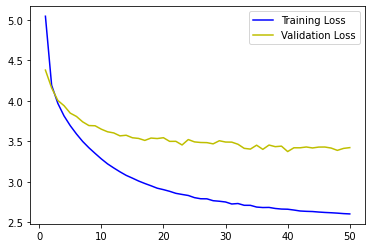

In [ ]:
SRC = Input
TRG = Output
import matplotlib.pyplot as plt

print(train_rec)

	 

epoch = list(range(1, 51))

plt.plot(epoch, train_rec, 'b-', label='Training Loss')
plt.plot(epoch, valid_rec, 'y-', label='Validation Loss')
plt.legend(loc='best')
plt.show()


In [ ]:
SRC = Input
TRG = Output
model.load_state_dict(torch.load('/content/drive/MyDrive/FYP/Model/model.pt'))

<All keys matched successfully>

In [ ]:
def translate_sentence(sentence, src_field, trg_field, model, device, max_len = 50000):
    
    model.eval()
        
    if isinstance(sentence, str):
        nlp = spacy.load('en')
        tokens = [token.text.lower() for token in nlp(sentence)]
    else:
        tokens = [token.lower() for token in sentence]

    tokens = [src_field.init_token] + tokens + [src_field.eos_token]
        
    src_indexes = [src_field.vocab.stoi[token] for token in tokens]

    src_tensor = torch.LongTensor(src_indexes).unsqueeze(0).to(device)
    
    src_mask = model.make_src_mask(src_tensor)
    
    with torch.no_grad():
        enc_src = model.encoder(src_tensor, src_mask)

    trg_indexes = [trg_field.vocab.stoi[trg_field.init_token]]

    for i in range(max_len):

        trg_tensor = torch.LongTensor(trg_indexes).unsqueeze(0).to(device)

        trg_mask = model.make_trg_mask(trg_tensor)
        
        with torch.no_grad():
            output, attention = model.decoder(trg_tensor, enc_src, trg_mask, src_mask)
        
        pred_token = output.argmax(2)[:,-1].item()
        
        trg_indexes.append(pred_token)

        if pred_token == trg_field.vocab.stoi[trg_field.eos_token]:
            break
    
    trg_tokens = [trg_field.vocab.itos[i] for i in trg_indexes]
    
    return trg_tokens[1:], attention

## Displaying Attention

In [ ]:
def display_attention(sentence, translation, attention, n_heads = 8, n_rows = 4, n_cols = 2):
    
    assert n_rows * n_cols == n_heads
    
    fig = plt.figure(figsize=(30,50))
    
    for i in range(n_heads):
        
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        
        _attention = attention.squeeze(0)[i].cpu().detach().numpy()

        cax = ax.matshow(_attention, cmap='bone')

        ax.tick_params(labelsize=12)
        ax.set_xticklabels(['']+['<sos>']+[t.lower() for t in sentence]+['<eos>'], 
                           rotation=45)
        ax.set_yticklabels(['']+translation)

        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [ ]:
src = "write a function that adds two numbers"
src=src.split(" ")
translation, attention = translate_sentence(src, SRC, TRG, model, device)

print(f'predicted trg sequence: ')
print(translation)
print("code: \n", untokenize(translation[:-1]).decode('utf-8'))

predicted trg sequence: 
[(57, 'utf-8'), (1, 'def'), (1, 'add'), (53, '('), (1, 'x'), (53, ','), (1, 'y'), (53, ')'), (53, ':'), (4, '\n'), (5, '    '), (1, 'return'), (1, 'x'), (53, '+'), (1, 'y'), (4, ''), (6, ''), (0, ''), '<eos>']
code: 
 def add (x ,y ):
    return x +y 


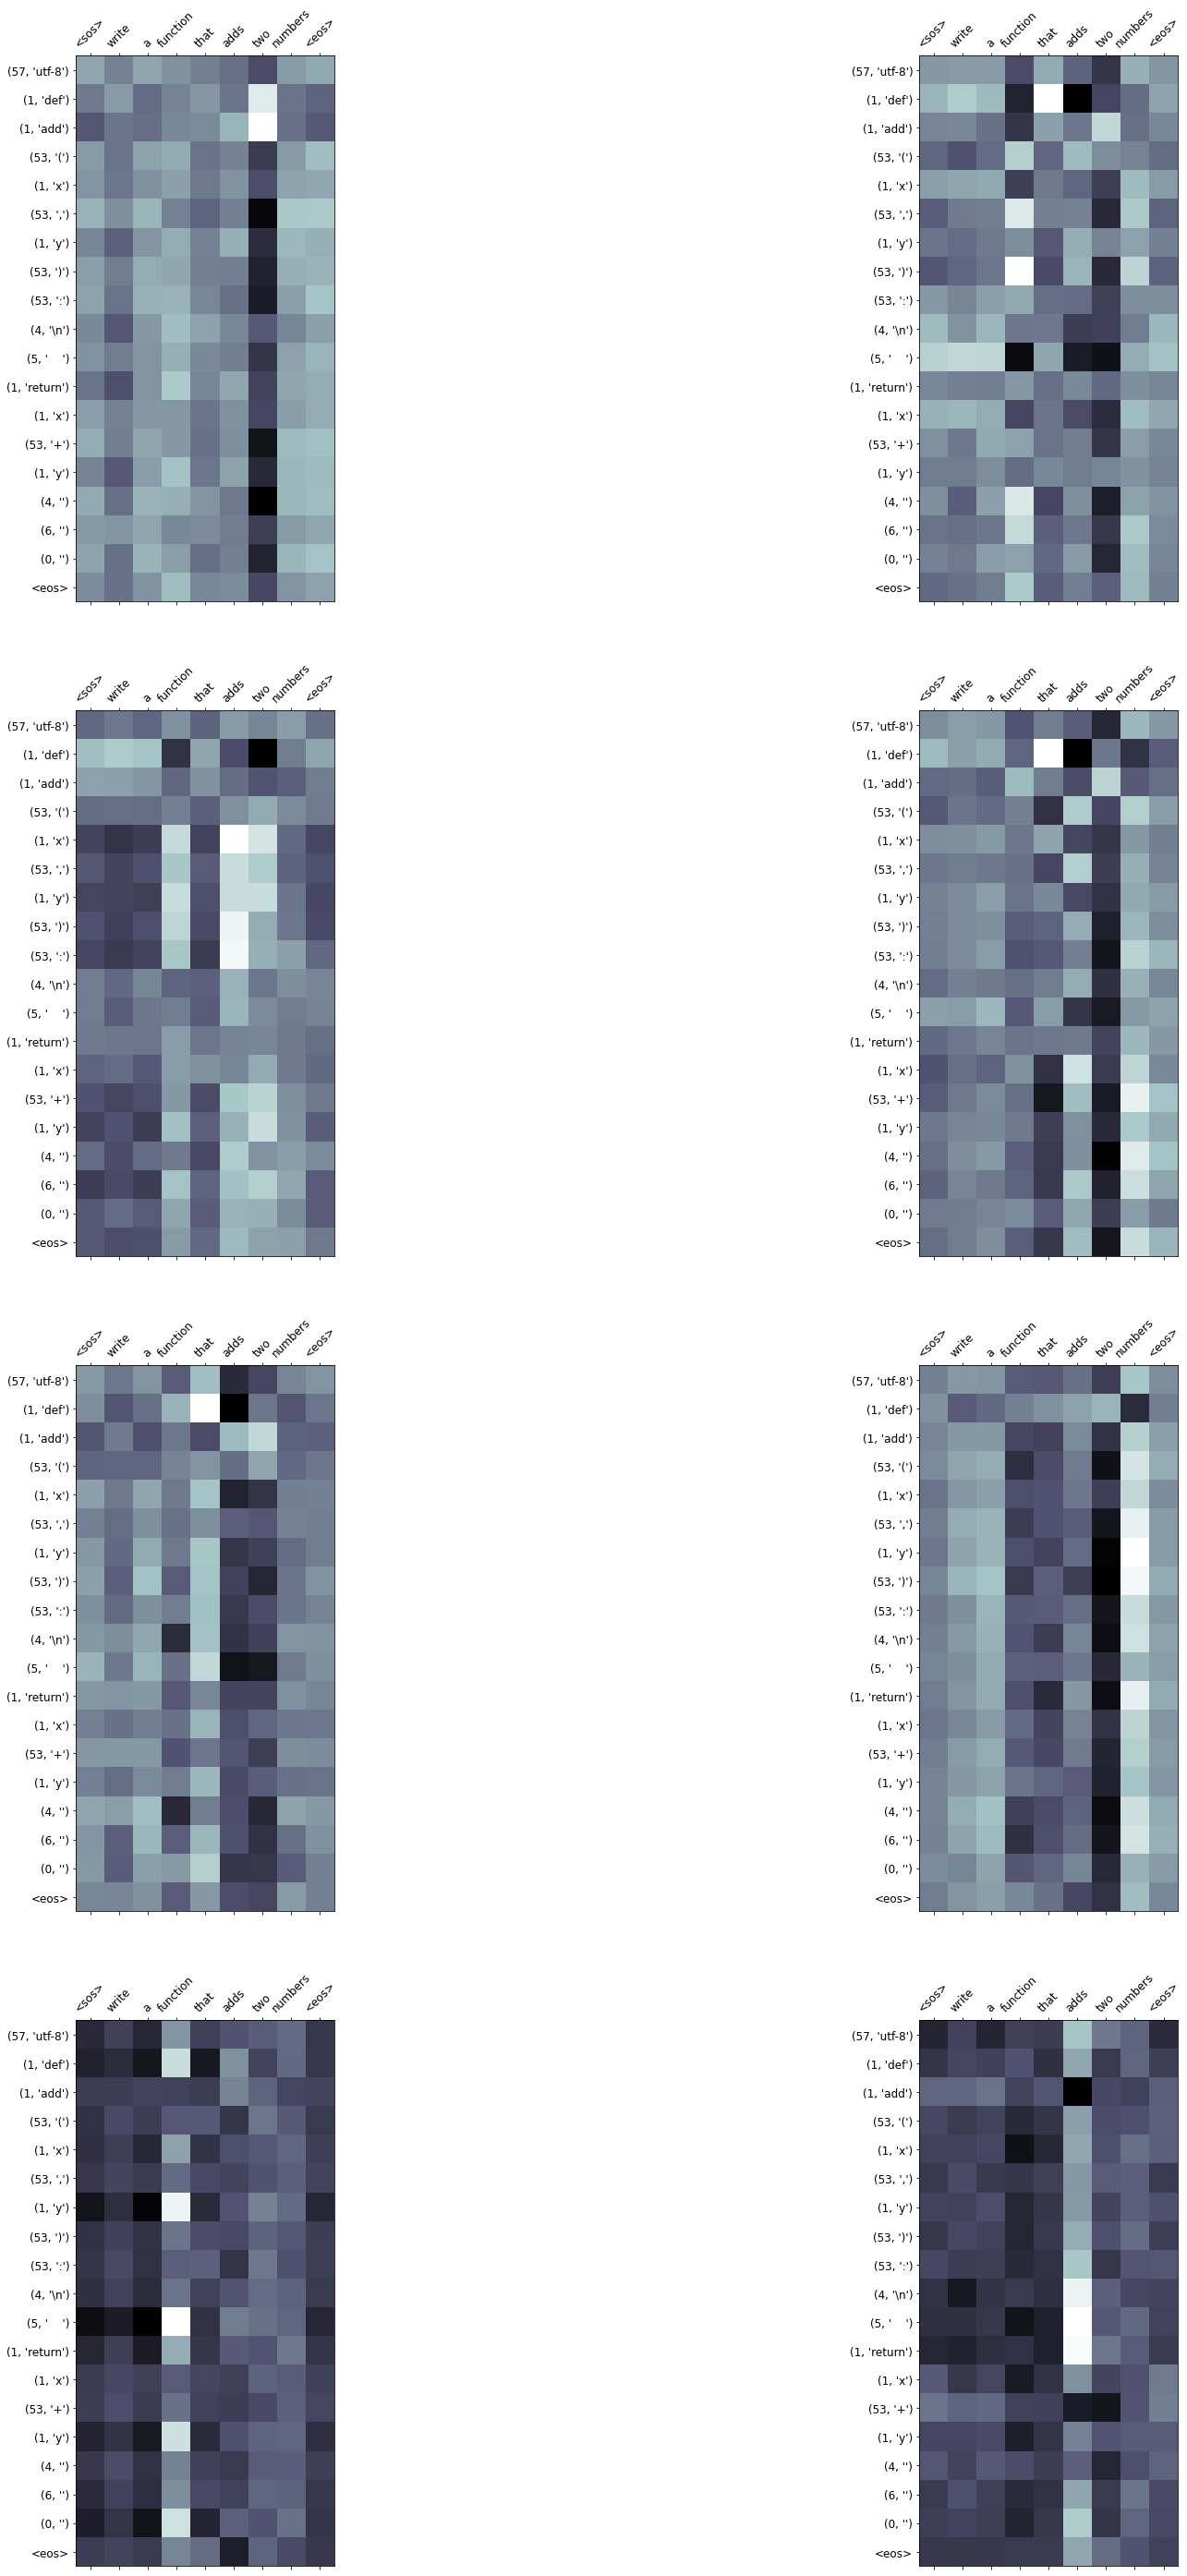

In [ ]:
display_attention(src, translation, attention)


# Sample Outputs for English to Python translation.

Lets load our pretrained model to perform inference on a set of examples

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/FYP/Model/model.pt'))

<All keys matched successfully>

Function that translates an English src string to python code.

In [ ]:
def eng_to_python(src):
  src=src.split(" ")
  translation, attention = translate_sentence(src, SRC, TRG, model, device)

  #print(f'predicted trg: \n')
  # print(translation)
  return untokenize(translation[:-1]).decode('utf-8')


In [ ]:
SRC = Input
TRG = Output

##Generate Output


In [ ]:
import pandas as pd
dataSet = pd.read_csv('/content/drive/MyDrive/FYP/Datasets/english_to_python.csv')
dps = []
ques = dataSet['question']
sol = dataSet['snippet']


print(len(ques), len(sol))

for i in range(len(ques)):
  if ques[i] == '':
      print("empty")
      #dps.append(dp)
  else:  
    dp = {"question": ques[i], "solution": sol[i]}
    dps.append(dp)

print(dps[98])
print(len(dps))

FileNotFoundError: ignored

In [ ]:
ans = []
data = []
n = 0
print(dps[1304])
for dp in dps:
  try:
    src = dp['question']
    response = eng_to_python(src)
    ans.append(response)
    d = {'question':dp['question'], 'snippet':dp['solution']}
    data.append(d)
    n= n+1
    print(n)
    if n > 4000:
      break
  
  except:
    n = n+1
    print("except", n)
    if n > 4000:
      break

{'question': '     Thread(target=print_time, args=("Thread-1", 4, )).start() \n', 'solution': nan}
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
except 98
except 99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249

In [ ]:
import csv

csv_file = []
f = [ "question", "snippet"]
for i, dp in enumerate(data):
  text = {'question': dp['question'], 'snippet':dp['snippet']}
  #print(text)
  csv_file.append(text)

with open('/content/drive/MyDrive/FYP/Datasets/testing_1.csv','w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames = f)
        writer.writeheader()
        
        writer.writerows(csv_file)

In [ ]:
import csv

csv_file = []
f = ["snippet"]
for  dp in ans:
  text = {'snippet':dp}
  #print(text)
  csv_file.append(text)

with open('/content/drive/MyDrive/FYP/Datasets/answer_1.csv','w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames = f)
        writer.writeheader()
        
        writer.writerows(csv_file)

## Example 1

In [ ]:
src = "program to sort a list of dictionaries by key"

eng_to_python(src)

## Example 2

In [ ]:
src = "function to merge two lists"

eng_to_python(src)

predicted trg: 

def merge_lists (l1 ,l2 ):
    return l1 +l2 


## Example 3

In [ ]:
src = "program to find gcd"

eng_to_python(src)

predicted trg: 


var_1 =int (input ("Enter a number: "))

for i in range (1 ,var_1 +1 ):
   if (i %i )==0 :
       print (i ,var_1 )


## Example 4

In [ ]:
src = "program to calculate simple interest"

eng_to_python(src)

predicted trg: 


p =float (input ("Enter the principle amount : "))
r =float (input ("Enter the rate of interest : "))
r =float (input ("Enter the time in the years: "))


## Example 5

In [ ]:
src = "function to sum odd elements of list"

eng_to_python(src)

predicted trg: 

def sum_odd_elements (var_1 :list ):
    return sum ([i for i in var_1 if i %2 ==1 ])


## Example 6

In [ ]:
src = "program to multiply integers in a list"

eng_to_python(src)

predicted trg: 

def multiplyList (myList ):
    result =1 
    for x in myList :
         result =result *x 
    return result 



## Example 7

In [ ]:
src = "program to reverse a string"

eng_to_python(src)

predicted trg: 


def reverse (var_1 ):
    s =var_1 (var_1 )
    p =var_1 [::::-1 ]
    return p 


## Example 8

In [ ]:
src = "function to find reverse of a string"

eng_to_python(src)

predicted trg: 


def revStr (var_1 ):
  var_1 =var_1 [:::-1 ]
  return var_1 


## Example 9

In [ ]:
src = "program to find the length of tuple"

eng_to_python(src)

predicted trg: 

tup =(1 ,,)



## Example 10

In [ ]:
src = "program to find area"

eng_to_python(src)

predicted trg: 


var_1 =5 
var_2 =10 

print (var_1 *var_2 )


## Example 11

In [ ]:
src = "program to print epoch timestamp"

eng_to_python(src)

predicted trg: 

import time 
def run_float (n =1 ):
    for i in range (n ):
        var_1 =var_1 (n )
        var_2 =3.1415 

import time .perf_counter ()
    import time .perf_counter ()
    return var_2 


## Example 12

In [ ]:
src = "program to find ascii value of charecter"

eng_to_python(src)

predicted trg: 

var_1 =65 
print (f'The ASCII value {value} is of the character {chr(value)}')


## Example 13

In [ ]:
src = "function to find fibonacci sequence"

eng_to_python(src)

predicted trg: 


def fib (n ):
    if n <=1 :
        return n 
    else :
        return (fib (n -1 )+fib (n -2 ))


## Example 14

In [ ]:
src = "function to find largest element in a dictionary"

eng_to_python(src)

predicted trg: 


def dic_largest (var_1 ):
    return max (var_1 .values ())


## Example 15

In [ ]:
src = "program to convert list of tuples into a dictionary"

eng_to_python(src)

predicted trg: 

var_1 =[1 ,2 ,3 ,4 ,5 ]
var_2 =[5 ,6 ,7 ,8 ,9 ]
print (var_2 (var_1 ))


## Example 16

In [ ]:
src = "function to convert to binary"

eng_to_python(src)

predicted trg: 

def convertstringtobinary (text ):
	for var_1 in text :
		bin =int (var_1 ,asciiVal )
		asciiVal =int (var_1 )
		while asciiVal >0 :
			if asciiVal %2 ==0 :
				bin =bin +'0'
			asciiVal =int (asciiVal /2 )
		return (bin +" : "+bin [:::-1 ])
	else :
       print (bin ))





## Example 17

In [ ]:
src = "program to implement a linked list"

eng_to_python(src)

predicted trg: 


class Dequeue :
    def __init__ (self ):
        self .items =[]

    def is_empty (self ):
        return self .items ==[]

    def push (self ,data ):
        self .items .append (data )

    def append_left (self ,data ):
        self .items .append (data )

    def pop (self ):
        return self .items .pop (self )

s =Stack ()
print ('Menu')
print ('appendleft <value>')
print ('pop')
print ('quit')

while True :
    do =input ()

    operation =do [1 ].is_empty ()

elif operation =='append':
        if operation =='append':
        s .append ('Dequeue is empty.')
        if operation =='quit':
            print ('Popped value from right: ',s )
        elif operation =='quit':
        break         


## Example 18

In [ ]:
src = "program to add lists elementwise"

eng_to_python(src)

predicted trg: 


def add (list ,var_1 ):
    sum =0 
    for i in range (0 ,len (list )-1 ):
        sum +=list [i ]
    return sum 


## Example 19

In [ ]:
src = "program to find common values between two sets"

eng_to_python(src)

predicted trg: 


var_1 ={"apple","banana","cherry"}
var_2 ={"google","microsoft","apple"}

var_1 .difference_update (var_2 )
print (var_2 )


## Example 20

In [ ]:
src = "program to find number of unique values in a list"

eng_to_python(src)

predicted trg: 

var_1 =[1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ]
print (var_1 )


## Example 21

In [ ]:
src = "function to remove empty lists from a list of lists"

eng_to_python(src)

predicted trg: 

def removeEmptyList (var_1 ):
  res =[ele for ele in var_1 if ele !=[]]
  return res 


## Example 22

In [ ]:
src = "write a function to capitalize a string"

eng_to_python(src)

predicted trg: 

def reverse_string (var_1 ):
    return var_1 [:::-1 ]


## Example 23

In [ ]:
src = "write a function to find the area of a circle"

eng_to_python(src)

predicted trg: 

def findArea (r ):
    PI =3.142 
    return PI *(r *r )


## Example 24

In [ ]:
src = "write a python program to merge two dictionaries"

eng_to_python(src)

predicted trg: 

set1 ={10 ,20 ,30 ,40 ,50 }
set2 ={30 ,40 ,50 ,60 ,70 }
print (set1 .union (set2 ))


## Example 25

In [ ]:
src = "write a function to find factorial"

eng_to_python(src)

predicted trg: 


def factorial (n ):
    if n ==1 :
        return 1 
    else :
        return n *factorial (n -1 )


In [ ]:
src = "function to calculate square"

eng_to_python(src)

predicted trg: 

def cal_area_square (var_1 ):
    return var_1 **2 


In [ ]:
src = "function to calculate the roots of a polynomial"

eng_to_python(src)

predicted trg: 

def prod_of_roots (a :float ,b :float ):
    if a :
        return -b /a 
    else :
        return None 
